#### CSCI-UA.0473-​001 Introduction to Machine Learning

# Homework 1


### Name: Laurence (LJ) Brown


### Due: Oct. 2, 2019


## Goal:  The goal of this homework is to practice implementing a logistic regression model and gradient descent as well as to explore some theoretical concepts.

You will need the following packages below to do the homework.  Please DO NOT import any other packages.

In [1]:
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

## Problem 1: Gradient Descent (40 pts total)

In this problem we will study gradient descent for optimization.

### Part (a) (10pts) Implementing gradient descent with a fixed learning rate

Using autograd, implement gradient descent with a fixed learning rate for a general function.

In [2]:
def gradient_descent_fixed(fun, x0, lr, iterations):
    """
    Input:
        fun : function
        x0  : initial point
        lr  : fixed learning rate
        iterations : number of iterations to perform

    Return:
        x   : minimizer to fun
    """
    grad_fun = grad(fun)
    
    xi = x0
    for i in range(iterations): 
        xi = xi - lr*grad_fun(xi)
        
    return xi

### Part (b) (10 pts) Using a variable learning rate

Sometimes it is necessary to decrease our learning rate as we iterate to help gradient descent converge.  Implement gradient descent below where the learning rate at iteration $i$ is given by
$$
\mathrm{lr}_i = \frac{\mathrm{lr}_0}{i+1}.
$$

In [3]:
"""
Input:
    fun : function
    x0  : initial point
    lr  : initial learning rate
    iterations : number of iterations to perform
    
Return:
    x   : minimizer to fun
"""
def gradient_descent_variable(fun, x0, lr, iterations, iteration_offset=0): 
    grad_fun = grad(fun)
    alpha = lambda i: lr / (i+1.0)
    
    xi = x0
    for i in range(iterations): 
        xi = xi - alpha(i+iteration_offset)*grad_fun(xi)

    return xi

### Part (c) (10 pts)  Choosing the learning rate

Let $\alpha$ denote the learning rate and consider the function $f(x) = \frac{1}{2}x^2$.  The gradient descent update rule at iteration $n+1$ is given by
$$
x_{n+1} = x_n - \alpha f'(x_n)
$$
Is there a critical value $\alpha_0$ so that if $\alpha \ge \alpha_0$ then gradient descent will not converge for $f(x)$?  If so what is it and explain why?

#### Convergent $\alpha$'s for $f(x) = \frac{x^2}{2}$ gradient descent

The sequence, 

$$
\lim_{n \rightarrow \infty} x_n,
$$

converges or diverges to/from the root of $f$ depending on the learning rate, $\alpha \in \mathbb{R}$, and the initial guess, $x_0 \in \mathbb{R}$.

\begin{equation}
   \alpha \in (0,2) \text{ converges } \forall \, x_0 \text{, }
\end{equation}
\begin{equation}
   \alpha \notin (0,2) \text{ diverges } \forall \, x_0 \neq 0
\end{equation}


We can write the $n^{th}$ term of the fixed-point iteration dirrectly as,

\begin{equation} \tag{1}
x_n = \beta^n x_0
\end{equation}


$$
\\
\text{ where, } \\
\beta = 1 - \alpha
$$

This comes from plugging in $f'$ to the equation for an update step of gradient descent,

$$
    x_{n} \, = \, x_{n-1} - \alpha f'(x_{n-1}) \, = \, (1 - \alpha)x_{n-1},
$$

$$
    f'(x) = x
$$

Since we know the function, $f(x) = \frac{x^{2}}{2}$, has a minimum at $x = 0$, then we can see that the iterates are only gaurenteed to converge for $|\beta| < 1$.

$$
   \lim_{n \rightarrow \infty} |\beta^n x_0| = 
\begin{cases}
    0       & 	\text{if } |\beta| < 1,	\\
    0       & 	\text{if } x_0 = 0,	\\
    |x_0|   &	\text{if } |\beta| = 1,	\\
    \infty  &	\text{if } |\beta| > 1,	\\
\end{cases}
$$



This leads to the convergent range of $\alpha$'s,

$$
|\beta| < 1
$$

$$
\Rightarrow |1 - \alpha| < 1
$$

$$
\Rightarrow -1 < 1 - \alpha < 1
$$

$$
\Rightarrow -2 < - \alpha < 0
$$

$$
\Rightarrow 2 > \alpha > 0
$$

$$
\alpha \in (0,2)
$$

### Part (d)  (10 pts) Feature scaling

Oftentimes it is advantageous to rescale or normalize our features.  As a toy example suppose we want to predict a person's weight (in kgs.) based on their height.  We would like an algorithm that gives equally good predictions whether height is measured in centimeters or kilometers.  For a concrete example, consider the 2D optimization problems:
$$
\mathrm{argmin}_{x\in \mathbb{R}^2}\ x^T \Sigma_i x, \quad i = 1,2
$$
where
$$
\Sigma_1 = \begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix}, \quad 
\Sigma_2 = \begin{bmatrix}
1 & 0\\
0 & 100
\end{bmatrix}.
$$
Suppose our starting point is the same $x_0 = (1, 1)^T$ for both optimization problems.  For a fixed learning rate, will gradient descent perform better on problem $i=1$ or $i=2$?  Explain why.

#### Feature scalling's affect on the range of convergent $\alpha$'s and the rate of convergence during gradient descent

Let, 
$$
f(x) = x^T \Sigma x = \, \sum_{j}^{2} \sigma_{j} \, x_{j}^{2}
$$

be the function to minimize. And where,

\begin{equation}
x = \begin{bmatrix}
x_1 \\
x_2 
\end{bmatrix},
\quad
\Sigma = \begin{bmatrix}
\sigma_{1,1} & 0\\
0 & \sigma_{2,2}
\end{bmatrix},
\quad
\sigma = \begin{bmatrix}
\sigma_{1} \\
\sigma_{2}
\end{bmatrix}
= diag(\Sigma)
\end{equation}



The $n^{th}$ vector, $^{(n)}x$, of the fixed point iteration for this particular function can be written directly from the initial guess, $^{(0)}x$, as,

\begin{equation} \tag{2}
^{(n)}x = B^n \; ^{(0)}x
\end{equation}

$$
\\
\text{ where $B \in \mathbb{R}^{2 \times 2}$ is a diagnol matrix with entries, } \\
\\
\beta_{j,j} = (1 \, - 2 \alpha \sigma_j ) \in \mathbb{R}
$$

The sequence of vectors, 

$$
\lim_{n \rightarrow \infty} \; ^{(n)}x,
$$

converges or diverges to/from the minimum of $f$ (the root in this case) depending on: the learning rate, $\alpha \in \mathbb{R}$, the initial guess, $^{(0)}x \in \mathbb{R}^2$ and the maximum absolute value of the entries of $\sigma \in \mathbb{R}^2$ (or the maximum absolute value of the diganol entries of $\Sigma$).

\begin{equation}
 sign(\sigma_{j})* \Big( 0 < \alpha < \frac{1}{\sigma_{j}} \Big) \, \text{ converges } \forall \, ^{(0)}x \text{, }
\end{equation}

\begin{equation}
  \text{otherwise the sequence diverges } \forall \, ^{(0)}x \neq \vec{0}
\end{equation}


where,
$$
\sigma_j = max \Big( |\sigma_k| \Big) \; for \; \sigma_k \in \sigma
$$

$$ (\; derivation \; later \;) $$

For the situations $i=1,2$ defined above where $^{(0)}x = (1,1)^T$ you get the following covergent ranges,

$$
 \alpha \in (0, \, 1 ) \; \text{for} \, i = 1,
$$

$$
 \alpha \in (0, \, \frac{1}{100} ) \; \text{for} \, i = 2
$$

So we can see that the unnormalized features for the second optimization porblem, $ i = 2 $ leads to a much narrower range of convergent alphas.

#### Derivation of convergence range

Above I said you can write the $n^{th}$ vector of the fixed-point iteration dirrectly from the inital vector, $^{(0)}x$, as,

\begin{equation} \tag{2}
^{(n)}x = B^n \; ^{(0)}x
\end{equation}

$$
\\
\text{ where $B \in \mathbb{R}^{2 \times 2}$ is a diagnol matrix with entries, } \\
\\
\beta_{j,j} = (1 \, - 2 \alpha \sigma_j ) \in \mathbb{R}
$$

This comes from plugging in $\frac{\partial f}{\partial x_j}$ to the equation for an update step of gradient descent for the **scalar**, $x_j$,

$$
^{(n)}x_j = ^{(n-1)}x_j - \alpha  \frac{\partial f(\,^{(n-1)}x_j)}{\partial x_j},
$$

$$
\frac{\partial }{\partial x_j} f(x) \, = \, 2 \sigma_{j} x_{j}
$$

$$
\Rightarrow \quad ^{(n)}x_j = ^{(n-1)}x_j - 2 \alpha \sigma ^{(n-1)} x_j \; = \; (1 - 2 \alpha \sigma_j) ^{(n-1)} x_j \; = \; \beta_{j,j} \, ^{(n-1)} x_j
$$

Where the $j^{th}$ element if the $n^{th}$ term of the iteration can be written directly given, $^{(0)}x_j$, as

$$
^{(n)}x_j = \; {\beta_{j,j}}^n \, ^{(0)} x_j
$$

And similarly the $n^{th}$ **vector**, $^{(n)}x$, can be written,

\begin{equation} \tag{2}
^{(n)}x = B^n \; ^{(0)}x
\end{equation}

Given the initial guess, $^{(0)}x = (1,1)^{T}$, the equation above simplifies to,

\begin{equation}
^{(n)}x = 
\begin{bmatrix}
{\beta_{1,1}}^{n} & 0\\
0 & {\beta_{2,2}}^{n}
\end{bmatrix}
\begin{bmatrix}
1 \\
1
\end{bmatrix}
=
\begin{bmatrix}
{\beta_{1,1}}^{n}\\
{\beta_{2,2}}^{n}
\end{bmatrix}
\end{equation}

Since we know the function, $f(x) = \, \sum_{j}^{2} \sigma_{j,j} x_{j}^{2}$, has a minimum at $x = \vec{0}$, then we can see that the iteratation is only gaurenteed to converge for $||B||_1 < 1$. With initial guess, $^{(0)}x = \vec{1}$, the iteration will **only** converge if $||B||_1 < 1$.

\begin{equation}
\lim_{n \rightarrow \infty} \, ^{(n)}x = \vec{0} \; \; iff \; ||B||_1 < 1, \quad for \; ^{(0)}x \neq \vec{0}
\end{equation}


So the convergence is solely dependent on the absolute values of the diagonal element of $B$ being strictly less than $1$. Then the convergent range of $\alpha$'s is determined solely by the largest absolute value diagonal entry of $\Sigma$.


$$
|\beta_{j,j}| = |1 - 2 \alpha \sigma_{j,j}| < 1, \; \forall j
$$

$$
\Rightarrow -1 < 1 - 2\alpha \sigma_{j,j} < 1
$$

$$
\Rightarrow 0 < \alpha \sigma_{j,j} < 1
$$

\begin{equation}
 sign(\sigma_{j})* \Big( 0 < \alpha < \frac{1}{\sigma_{j}} \Big) \, \text{ converges } \forall \, ^{(0)}x \text{, }
\end{equation}

$$
\sigma_j = max \Big( |\sigma_k| \Big) \; for \; \sigma_k \in \sigma
$$

Additionally the large variation in the sizes of $\sigma$'s leads to a large varaition in the rates of convergence for the different elements of $x$. This is especially problematic as the slower convergence rate (larger $\beta$ or larger $\mu$) dictates the time until convergence.  

\begin{equation}
\lim_{n \rightarrow \infty} \frac{|^{(n+1)}x_{j} - L|}{|^{(n)}x_{j} - L|} = \lim_{n \rightarrow \infty} \frac{|^{(n+1)}x_{j}|}{|^{(n)}x_{j}|} = 1 - 2 \alpha \sigma_{j,j} = \beta_{j,j}
\end{equation}



$$
\mu_j(\alpha) = 1 - 2 \alpha \sigma_{j,j} = \beta_{j,j}
$$

$$
\mu(\alpha) = max(\mu_1(\alpha), \mu_2(\alpha))
$$

/anaconda3/lib/python3.5/site-packages/matplotlib/legend.py:1363: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


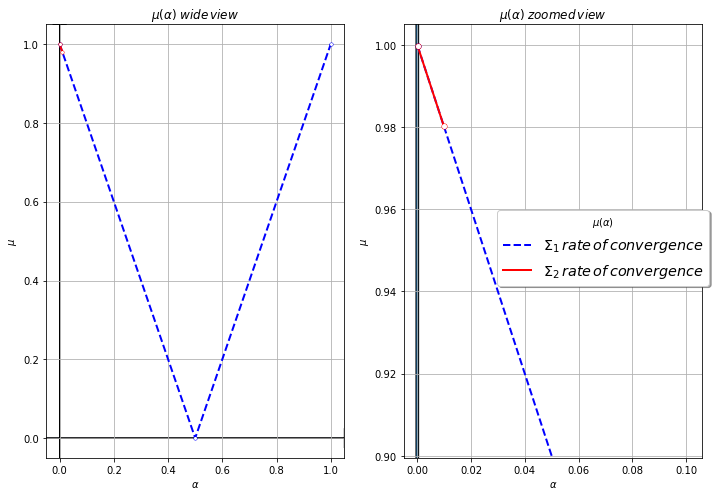

In [4]:
sigma1_p1, sigma2_p1 = 1, 1
sigma1_p2, sigma2_p2 = 1, 100

alphas_range_1 = np.linspace(0.0001,0.9999,num=10000)
alphas_range_2 = np.linspace(0.0001,0.0099,num=10000)

mu1_p1 = np.abs(1 -2*sigma1_p1*alphas_range_1)
mu2_p1 = np.abs(1 -2*sigma2_p1*alphas_range_1)
mus_p1 = np.maximum(mu1_p1,mu2_p1)

mu1_p2 = np.abs(1 -2*sigma1_p2*alphas_range_2)
mu2_p2 = np.abs(1 -2*sigma2_p2*alphas_range_2)
mus_p2 = np.maximum(mu1_p2,mu2_p2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))

lm1 = axes[0].plot(alphas_range_1, mus_p1, 'b--', linewidth=2)
lm2 = axes[0].plot(alphas_range_2, mus_p2, 'r', linewidth=2)

axes[1].plot(alphas_range_1, mus_p1, 'b--', linewidth=2)
axes[1].plot(alphas_range_2, mus_p2, 'r', linewidth=2)

axes[0].plot(alphas_range_1[0], mus_p1[0], color='b', marker='o', markersize=3)
axes[0].plot(alphas_range_1[0], mus_p1[0], color='w', marker='o', markersize=2)

axes[1].plot(alphas_range_1[0], mus_p1[0], color='b', marker='o', markersize=5)
axes[1].plot(alphas_range_1[0], mus_p1[0], color='w', marker='o', markersize=4)

axes[0].plot(alphas_range_1[-1], mus_p1[-1], color='b', marker='o', markersize=3)
axes[0].plot(alphas_range_1[-1], mus_p1[-1], color='w', marker='o', markersize=2)

axes[1].plot(alphas_range_1[-1], mus_p1[-1], color='b', marker='o', markersize=5)
axes[1].plot(alphas_range_1[-1], mus_p1[-1], color='w', marker='o', markersize=4)

axes[0].plot(alphas_range_2[0], mus_p2[0], color='r', marker='o', markersize=3)
axes[0].plot(alphas_range_2[0], mus_p2[0], color='w', marker='o', markersize=2)

axes[1].plot(alphas_range_2[0], mus_p2[0], color='r', marker='o', markersize=5)
axes[1].plot(alphas_range_2[0], mus_p2[0], color='w', marker='o', markersize=4)

axes[0].plot(alphas_range_2[-1], mus_p2[-1], color='r', marker='o', markersize=3)
axes[0].plot(alphas_range_2[-1], mus_p2[-1], color='w', marker='o', markersize=2)

axes[1].plot(alphas_range_2[-1], mus_p2[-1], color='r', marker='o', markersize=5)
axes[1].plot(alphas_range_2[-1], mus_p2[-1], color='w', marker='o', markersize=4)

# bounce 
axes[0].plot(0.5, 0, color='b', marker='o', markersize=3)
axes[0].plot(0.5, 0, color='w', marker='o', markersize=2)


axes[0].set_xlim((-0.05,1.05))
axes[0].set_ylim((-0.05,1.05))

axes[1].set_xlim((-0.005,0.106))
axes[1].set_ylim((0.8995,1.005))

left,right = axes[0].get_xlim()
low,high = axes[0].get_ylim()

axes[0].arrow( left, 0, right -left, 0, length_includes_head = False, head_width = 0.05 )
axes[0].arrow( 0, low, 0, high-low, length_includes_head = False, head_width = 0.05 ) 

axes[1].arrow( left, 0, right -left, 0, length_includes_head = False, head_width = 0.05 )
axes[1].arrow( 0, low, 0, high-low, length_includes_head = False, head_width = 0.05 ) 


axes[0].grid()
axes[1].grid()

axes[0].set_title('$\mu(\\alpha) \; wide \, view$')
axes[1].set_title('$\mu(\\alpha) \; zoomed \, view$')

axes[0].set_xlabel("$\\alpha$")
axes[1].set_xlabel("$\\alpha$")

axes[0].set_ylabel("$\mu$")
axes[1].set_ylabel("$\mu$")

lines = (lm1, lm2)
labels = ("$\Sigma_1 \, rate \, of \, convergence}$","$\Sigma_2 \, rate \, of \, convergence$")

fig.legend(lines,  
           labels=labels,  
           loc="center right",
           borderaxespad=0.5,
           title="$\mu(\\alpha)$",
           fontsize="x-large",
           framealpha=1.0,
           shadow=0.5
           )

fig.tight_layout()

plt.show()

From the above graphs you can see that not only is the range of $\alpha$'s that will lead to convergence restricted when there is a high varience between feature scales, but also (in the given example) the number of steps needed for the algorithm to converge is confined to the worst region of the graph (when $\mu \approx 1$).

## Problem 2:  Logistic Regression (60 pts total)

In this problem you will implement all of the steps that are taken care of whenever the "fit" function from sci-kit is called.

### Part (a) (15 pts) Logisitc Unit

For binary classification $y \in \{0,1\}$ we will model the posterior probability $p(y = 1 | x)$ with the logistic unit 
$$
h(x; w) = \frac{1}{1 + \exp(-w^Tx)}
$$
We will use the convention that $x_0 = 1$.  Implement this function below using the skeletal outline as a guide.  Suppose we use a discriminant function $f(x)$ which assigns the label $y = 1$ if $p(y = 1 | x) \ge 0.5$ and $0$ otherwise.  In other words, with a discriminant function we do not need the posterior probabilities but rather skip straight to the classification.  


Give a geometric interpretation of our classifier once the parameters $w$ have been learned.  What does the angle between $w$ and $x$ tell us about the predicted class value?  For which angles do we predict $y=1$?

#### Geometrix interpretation of classifier

$$
   class = 
\begin{cases}
    1       & 	\text{if } w^Tx \geq 0,	\\
    0       & 	\text{if }  w^Tx < 0	\\
\end{cases}
$$

Let, $w,x \in \mathbb{R}^n$. 

Geometrically, $w$ represents a normal vector to a class decision boundy, an $n-1$ dimensional hyper-plane that passes through the origin, and so is solely determined by its normal vector, $w$. Points that fall on the side of the hyper-plane that $w$ is pointing are in class one (or on it), while the points falling on the other side of the plane are in class zero.

$$
w^T \cdot ( v - \vec{0} ) = 0
$$

$$
\Rightarrow \; w^T v = 0
$$

Any vector, $v$, that satisfies the above equation lays on the hyper-plane defined by $w$ that acts as a decision boundry for the two different classes.

However, by setting $x_0 = 1$ we restrict the vector that points to different data points, $x$, to lay on a second $n-1$ dimensional hyper-plane. This second hyper-planes normal vector, $e_0$, (in which all data points lay) has entries, 

$$
e_0 = 1, 
$$
$$
e_i = 0 \; \text{  for} \,i = 1, 2, \ldots, n-1
$$

$e_0$ is also a point on this second plane so its equation is,

$$
 e_0^Tv = 1
$$


Then the intersection between these two hyper-planes becomes the actual decision boundry for the data points and has $n-2$ dimensions.


Then define, $D \in \mathbb{R}^{2 \times n}$ and $y \in \mathbb{R}^2$, to determine the points that lay on the intersection descision boundry, by whether or not they satisfy the equation,

$$ y = Dv $$

$$
D = \begin{bmatrix}
e_0^T \\
w^T
\end{bmatrix},
\quad
y = \begin{bmatrix}
1 \\
0
\end{bmatrix}
$$

However since we set all the $x_0$ values equal to one the top half of this system is redundant. What makes this usefull though is that by changing all $n$ entries of the $w$ vector, **any** $n-2$ dimensional hyper-plane located within the $n-1$ dimensional hyper-plane in which all $x$ vectors are confined can become a solution to the above system. Meaning that the decsion boundry that seperates the classes does not have to pass through the origin. Visually,

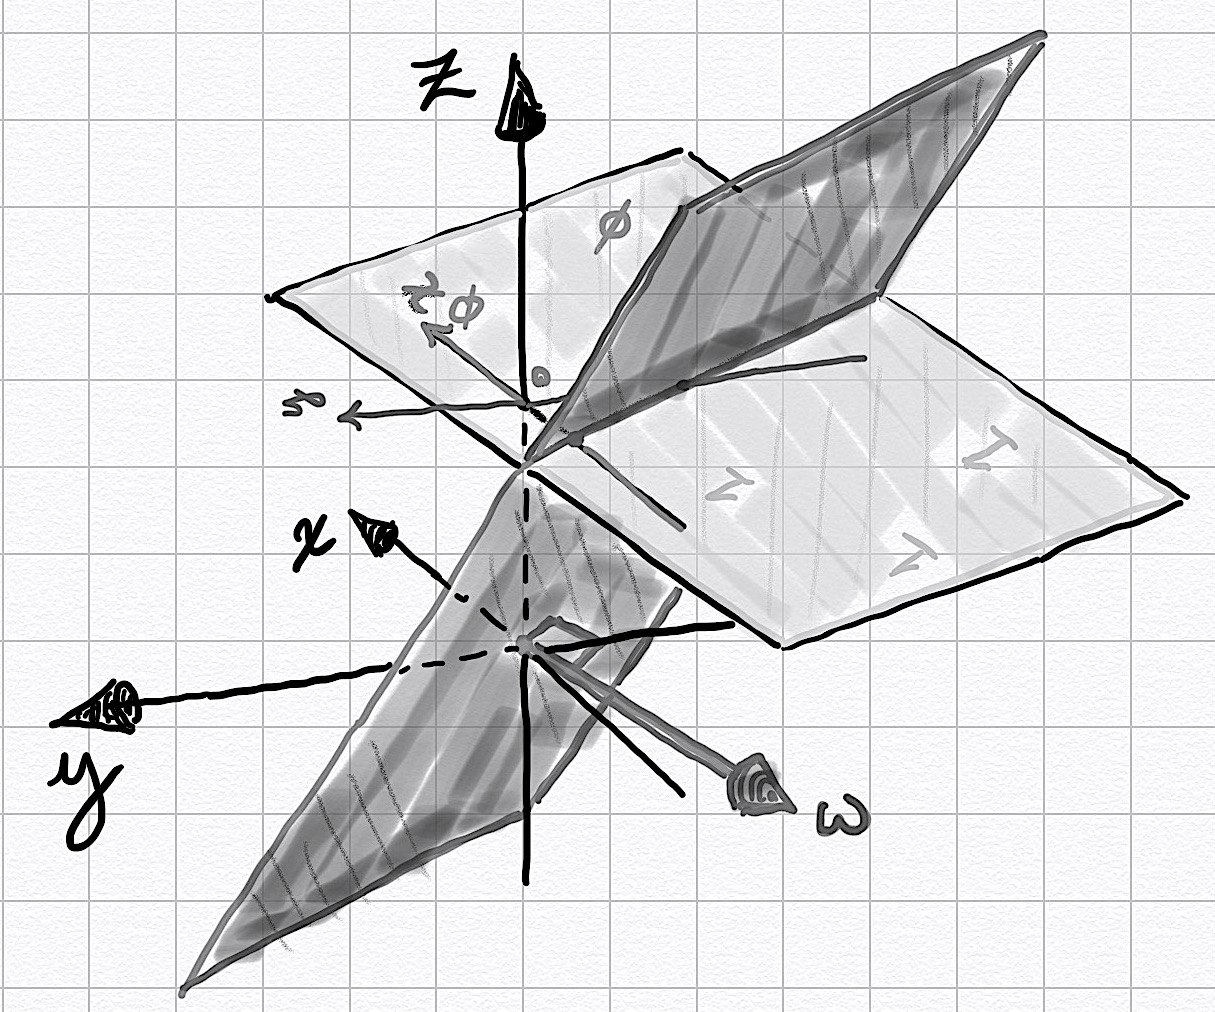

In [5]:
from IPython.display import Image
Image(filename='bias_term.jpeg') 

In [6]:
"""
Input:
    w: weight vector
    X: data

Return:
    logits : h(x;w)
"""

# avoids division by zero from overflow
epsilon = np.finfo(np.float32).eps

def logistic_unit(X, w):
    a = np.exp(-np.dot(X,w)) + 2*epsilon
    d = np.ones(shape=a.shape) + a
    logits = 1.0/d
    return logits

### Part (b) (10 pts) Deriving the loss function

We have implicitly made the assumption that $y|x \sim \mathrm{Bernoulli}(h(x;w))$.  If we have an iid dataset $\{(x_i,y_i)\}_{i=1}^N$, then we can write the data likelihood as
$$
p(\vec{y}| X, w) = \prod_{i=1}^N p(y_i | x_i, w)
$$
We can learn the parameter $w$ by maximizing this probability (i.e. we find the MLE) or equivalently minimizing $J(w) = -\log p(\vec{y} | X, w)$.  Derive the loss function $J(w)$ step-by-step and implement it using the skeletal outline below.

#### Loss function derivation

Given the assumtion that $y|x \sim \mathrm{Bernoulli}(h(x;w))$, we can write the probability of a single data point using the equation for the probability mass function of a Bernouli distribution,

$$
 p(y_i | x_i, w) = h(x_i;w)^{y_i} (1 - h(x_i;w))^{1-y_i},
$$

$$
 y_i \in \{ 0, 1 \}
$$



Substituting this probability mass function into the data likelihood equation,

$$
p(\vec{y} | X, w) = \prod_{i=1}^N h(x_i;w)^{y_i} (1 - h(x_i;w))^{1-y_i}
$$

The log liklehood (with the same MLE as log function is monotonically increasing) is then,

$$
log \, p(\vec{y} | X, w) = \sum_{i=1}^N log \, p(y_i | x_i, w) =
$$

$$
 = \sum_{i=1}^N \, y_i log \, h(x_i;w) + (1-y_i) log \, (1 - h(x_i;w))
$$

Taking the negitive of this function we get the cost funciton, $J$,

$$
J(w) = -\log p(\vec{y} | X, w) = \sum_{i=1}^N \, -y_i log \, h(x_i;w) - (1-y_i) log \, (1 - h(x_i;w))
$$

And,

$$
MLE_{\hat{w}} = argmin_w J(w)
$$


In [7]:
"""
Input:
    w : weight vector
    X : dataset features
    y : dataset targets

Return:
    J : loss of w given X,y
"""

def loss(w, X, y):
    h = logistic_unit(X,w)
    J = ( -y * np.log(h) - (1 - y) * np.log(1 - h) ).mean()
    #J = ( -y * np.log(h) - (1 - y) * np.log(1 - h) ).sum()
    return J


### Part (c) (5 pts) Splitting the data for training and testing

Now we'll actually learn a logistic regression model for some synthetic data.

First split the dataset into a training, validation, and test set.  Use a 40/40/20 split (roughly 40/40/20 is fine).

In [8]:
#
# generate data
#

def generate_data(n_samples = 10000, centers = 2, n_features = 20, cluster_std = 20):
    """ Generate fake data and return X,y """

    # We first generate some fake data.
    X, y = make_blobs(n_samples = n_samples, centers = 2, n_features = 20, cluster_std = 20)

    # We'll also augment the data so that x_0 = 1 for the intercept term.
    X = np.append(np.ones((len(X), 1)), X, axis = 1)
    
    return X,y

#
# split the data
#

def split_data(X, y, p_train=0.8, p_val=0.0, p_test=0.2):
    """ Split data and return data dictionary """
    
    #
    # set split percentages
    #
    
    assert p_train + p_val + p_test == 1

    data = {
        'train' : {},
        'val' : {},
        'test': {}
    }

    data['train']['p'], data['val']['p'], data['test']['p'] = p_train, p_val, p_test

    #
    # split the data
    #
    
    keys = [k for k,v in data.items()]
    p = [data[k]['p'] for k,v in data.items()]
    split_indices = np.random.choice(keys, size=y.shape[0], p=p)

    for k,v in data.items():
        k_indices = np.where(split_indices == k)
        data[k]['X'], data[k]['y'] = X[k_indices], y[k_indices]
        
    # return data dictionary
    return data

### Part (d) (20pts) 

Now use your gradient descent function to learn the parameters $w$ using 1000 iterations.  You may choose the learning rate and initial parameters $w_0$ for this problem.  Compare both the fixed learning rate and variable learning rate gradient descents side by side (i.e. 2 subplots).

For each method, plot the loss of both the training set and the validation set.  Make sure your plots are labeled properly with $x$ and $y$ axis labels, a legend, title, and different colors to distinguish the two curves on each subplot.

In [9]:
def fit(data, loss_function=loss, iterations=1000, lr=0.01, optimizer='gd', seed=0, histories=['train', 'val']):
    """ """
    assert optimizer in ['gd', 'gd_variable']
    
    # Generate a random initial weight vector
    np.random.seed(seed)
    w0 = np.random.rand(data['train']['X'].shape[1]) + 0.5*np.ones(shape=data['train']['X'].shape[1])
    
    # init history dict and arrays
    history = {}
    
    history['optimizer'] = optimizer
    history['iterations'] = iterations
    history['lr'] = lr
    history['seed'] = seed
    
    history_p = 0.1
    history_spacing = int(iterations*history_p)
    history_len = int(iterations*history_p)
    
    for k in histories:
        history[k] = np.zeros(shape=(history_len,))
        
    # wrap loss function for gradient descent training
    loss_gd = lambda wj: loss_function( wj, data['train']['X'], data['train']['y'] )
        
    # train
    sub_iterations = history_spacing
    wi = np.copy(w0)
    for hist_idx in range(history_len):
        
        # duplicate weights
        wi = np.copy(wi)
        
        #
        # perform sub iterations for chosen optomizer
        #
        
        if optimizer == 'gd_variable':
            
            # compute offset
            iteration_offset = hist_idx*history_spacing
            
            # run variable gradient descent
            wi = gradient_descent_variable(loss_gd, wi, lr, sub_iterations, iteration_offset=iteration_offset)
        
        else:
            
            # run gradient descent
            wi = gradient_descent_fixed(loss_gd, wi, lr, sub_iterations)
        
        
        #
        # save loss evaluations to history dict
        #
        
        for k in histories:
            history[k][hist_idx] = loss( wi, data[k]['X'], data[k]['y']) 
        
    # return final weights and history dict 
    return [wi, history]


In [10]:
def plot_histories(histories_list):
    
    n_row = 1
    n_col = len(histories_list)

    for c in range(1,n_col+1):
        hist = histories_list[c-1]
        
        optimizer = hist['optimizer']
        
        train_loss = hist['train']
        val_loss = hist['val']
        
        plt.subplot(1, n_col, c)
        plt.plot(train_loss)
        plt.plot(val_loss)
        
        plt.title('%s Loss History' % optimizer)
        plt.ylabel('Loss')
        plt.xlabel('epoch')
        
        plt.legend(['train', 'val'], loc='upper right')
    
    plt.tight_layout()
    plt.show()

In [11]:
#
# Generate and split data
#

X,y = generate_data()
data = split_data(X,y,p_train=0.4,p_val=0.4,p_test=0.2)

In [12]:
#
# train fixed learning rate 'gd' model
#

w_gd, history_gd = fit(data, lr=0.01, optimizer='gd', seed=1)

In [13]:
#
# train variable learning rate 'gd_variable' model
#

w_gdv, history_gdv = fit(data, lr=0.4, optimizer='gd_variable', seed=1)

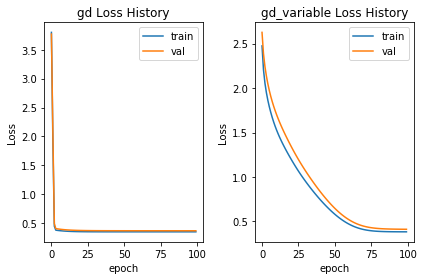

In [14]:
#
# Plot the validation and training loss for each model
#

histories = [history_gd, history_gdv]
plot_histories(histories)

### Part (e) (10 pts) Evaluating the model on the test set

Finally, we have trained our models and are ready to evaluate them on the test set.  For binary classification one way to check our classifier is to make a confusion matrix of our predictions.
$$
C = \begin{bmatrix}
\text{Predict 0, Actual 0} & \text{Predict 0, Actual 1}\\
\text{Predict 1, Actual 0} & \text{Predict 1, Actual 1}
\end{bmatrix}
$$
The diagonal elements are the number of samples that are correctly classified.

Use your trained models to classify samples in the test set according to whether $h(x_i; w) \ge 0.5$ or not and print the confusion matrices.  Also print the accuracy rate which is just the percentage of correctly classified examples for both models.

In [15]:
def h( X, w ):
    logits = logistic_unit(X, w)
    b = logits >= 0.5
    y_pred = b.astype(int)
    return y_pred

def confusion_matrix( y, y_pred ):
    p_indices = np.where(y == 0)
    n_indices = np.where(y == 0)
    
    # create class index map
    unique_values = np.unique(np.append(y, y_pred))
    num_classes = unique_values.shape[0]
    cim = {raw:map_index for raw, map_index in zip(unique_values,range(num_classes))}
    
    # init confusion matrix
    C = np.zeros((num_classes, num_classes))
    

    # fill confusion matrix
    for i in range(y.shape[0]):
        r,c = cim[y_pred[i]], cim[y[i]]
        C[r][c] += 1

    return C

def accuracy(confusion_matrix):
    correct = np.diag(C).sum()
    total = C.flatten().sum()
    return correct/total


In [16]:
#
# Evaluate Models on the Test Set
#

model_names = ['gd', 'gd_variable']
model_weights = [w_gd, w_gdv] 

for name, w in zip(model_names, model_weights):
    
    # compute model predictions
    y_pred = h(data['test']['X'], w)
    
    # compute model confusion matrix
    C = confusion_matrix(data['test']['y'], y_pred )
    
    # compute model accuaracy
    acc = accuracy(C)
    
    #
    # display
    #
    
    print("\nModel optimizer: %s\n\n\ttest accuracy: %s\n\tconfusion matrix: \n\n%s\n" % (name, acc, C))
    


Model optimizer: gd

	test accuracy: 0.8431179082387765
	confusion matrix: 

[[819. 145.]
 [173. 890.]]


Model optimizer: gd_variable

	test accuracy: 0.8273310310804144
	confusion matrix: 

[[735.  93.]
 [257. 942.]]

